<a href="https://colab.research.google.com/github/kareemullah123456789/cybersecurity_ML/blob/main/cyber_security_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base_path = "/content/drive/MyDrive/cybersecurity_data"

In [3]:
import sys
sys.path.append('/content/drive/MyDrive/cybersecurity_data')


In [6]:
import os

In [15]:
# -*- coding: utf-8 -*-
"""final_cyber.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1-pYtVGlb-kDWWmjTQ8PfRerQD4N77-x3

Cyber Threat Detection

- This project focuses on detecting cyber threats using machine learning techniques.
 By analyzing network traffic data, the model aims to identify and classify different types of cyber-attacks such as DDoS, Ransomware, and Normal traffic.
 The dataset contains various network attributes such as packet length, protocol type, and traffic flow metrics to help the model distinguish between normal and malicious activities.

*   Data Cleaning and Preprocessing
*   Exploratory Data Analysis
*   Model Selection
*   Hyper Parameter Tuning
"""

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score
from sklearn.naive_bayes import GaussianNB

# Load the dataset
cyber_data = pd.read_csv(os.path.join(base_path,'cyberfeddefender_dataset.csv'))

#Fetching first few rows from DataFrame
cyber_data.head()


,Timestamp,Source_IP,Destination_IP,Protocol,Packet_Length,Duration,Source_Port,Destination_Port,Bytes_Sent,Bytes_Received,...,Avg_Packet_Size,Total_Fwd_Packets,Total_Bwd_Packets,Fwd_Header_Length,Bwd_Header_Length,Sub_Flow_Fwd_Bytes,Sub_Flow_Bwd_Bytes,Inbound,Attack_Type,Label
0,10/23/2024 12:00,192.168.0.1,192.168.0.1,ICMP,1155,4.01,53,53,675,877,...,512,21,34,256,256,697,1028,1,DDoS,1
1,10/23/2024 12:00,192.168.0.7,172.16.0.5,ICMP,1776,3.75,22,22,297,1062,...,1024,14,19,512,256,513,1300,1,DDoS,1
2,10/23/2024 12:00,192.168.0.7,10.0.0.3,UDP,627,4.24,80,8080,122,723,...,512,10,41,512,256,250,497,0,DDoS,1
3,10/23/2024 12:00,192.168.0.7,10.0.0.3,UDP,1754,3.09,443,443,1626,1703,...,256,37,44,128,256,985,1471,0,Ransomware,0
4,10/23/2024 12:00,192.168.0.1,10.0.0.4,UDP,1326,2.52,80,443,1851,771,...,1024,40,16,512,256,1877,595,1,Normal,1


In [16]:

# Replacing all column names with smaller case and replace " " with "_" in column names
cyber_data.columns = cyber_data.columns.str.lower().str.replace(' ', '_')

#Fetching first few rows from DataFrame
cyber_data.head()


,timestamp,source_ip,destination_ip,protocol,packet_length,duration,source_port,destination_port,bytes_sent,bytes_received,...,avg_packet_size,total_fwd_packets,total_bwd_packets,fwd_header_length,bwd_header_length,sub_flow_fwd_bytes,sub_flow_bwd_bytes,inbound,attack_type,label
0,10/23/2024 12:00,192.168.0.1,192.168.0.1,ICMP,1155,4.01,53,53,675,877,...,512,21,34,256,256,697,1028,1,DDoS,1
1,10/23/2024 12:00,192.168.0.7,172.16.0.5,ICMP,1776,3.75,22,22,297,1062,...,1024,14,19,512,256,513,1300,1,DDoS,1
2,10/23/2024 12:00,192.168.0.7,10.0.0.3,UDP,627,4.24,80,8080,122,723,...,512,10,41,512,256,250,497,0,DDoS,1
3,10/23/2024 12:00,192.168.0.7,10.0.0.3,UDP,1754,3.09,443,443,1626,1703,...,256,37,44,128,256,985,1471,0,Ransomware,0
4,10/23/2024 12:00,192.168.0.1,10.0.0.4,UDP,1326,2.52,80,443,1851,771,...,1024,40,16,512,256,1877,595,1,Normal,1


In [17]:

# Check for missing values
print(cyber_data.isnull().sum())

print(cyber_data.dtypes)


timestamp             0
source_ip             0
destination_ip        0
protocol              0
packet_length         0
duration              0
source_port           0
destination_port      0
bytes_sent            0
bytes_received        0
flags                 0
flow_packets/s        0
flow_bytes/s          3
avg_packet_size       0
total_fwd_packets     0
total_bwd_packets     0
fwd_header_length     0
bwd_header_length     0
sub_flow_fwd_bytes    0
sub_flow_bwd_bytes    0
inbound               0
attack_type           0
label                 0
dtype: int64
timestamp              object
source_ip              object
destination_ip         object
protocol               object
packet_length           int64
duration              float64
source_port             int64
destination_port        int64
bytes_sent              int64
bytes_received          int64
flags                  object
flow_packets/s        float64
flow_bytes/s          float64
avg_packet_size         int64
total_fwd_packe

In [18]:

#To check for no of unique values of 'flow_bytes/s'
print(cyber_data['flow_bytes/s'].nunique)


<bound method IndexOpsMixin.nunique of 0        583.2
1       1100.6
2        339.1
3       1913.5
4        105.9
         ...  
1425     509.6
1426     596.8
1427     750.1
1428     735.7
1429    1625.9
Name: flow_bytes/s, Length: 1430, dtype: float64>


In [19]:




# Impute missing values (if any) with median for numerical features - In this case - flow_bytes/s
imputer = SimpleImputer(strategy='median')
cyber_data[['flow_bytes/s']] = imputer.fit_transform(cyber_data[['flow_bytes/s']])




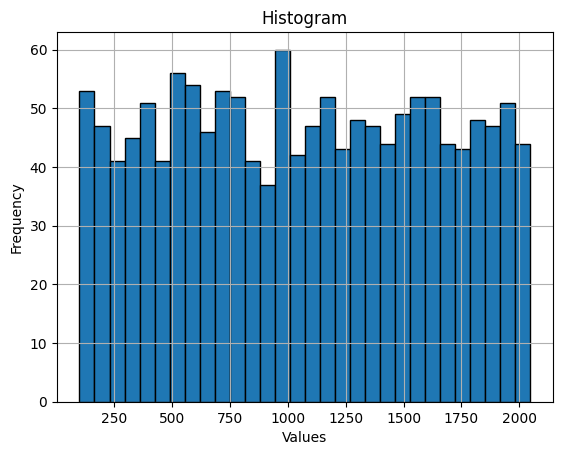

In [20]:

"""Exploratory Data Analysis"""

# Checking the distribution of 'flow_bytes/s'
import matplotlib.pyplot as plt
cyber_data['flow_bytes/s'].hist(bins=30, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


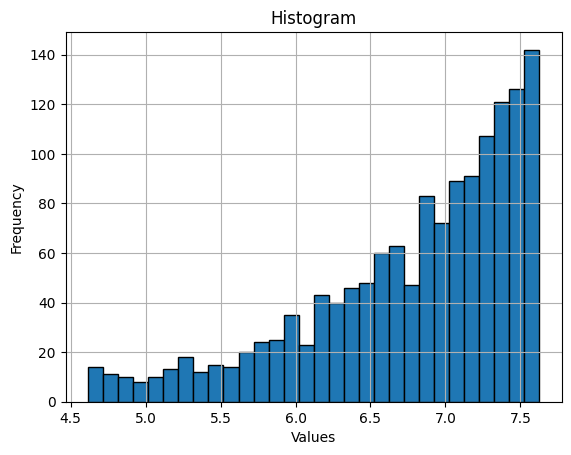

In [22]:

#Log1p Transformation of 'flow_bytes/s'
cyber_data['transformed_flow_bytes/s'] = np.log1p(cyber_data['flow_bytes/s'])

cyber_data['transformed_flow_bytes/s'].hist(bins=30, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#Removing insignificant columns after testing the model as the below columns had no impact on Label
insignificant_columns = ['timestamp','source_ip','destination_ip','flow_bytes/s','transformed_flow_bytes/s']

In [26]:
import pandas as pd

# If you previously did: cyber_data.copy = cyber_data.copy()
# then cyber_data.copy is now a DataFrame, not a method. Undo it:
if isinstance(getattr(cyber_data, "copy", None), pd.DataFrame):
    del cyber_data.copy  # remove the bad attribute so Python finds the real method again

# Now make a proper copy (either line works)
cyber_data = cyber_data.copy()                 # instance method
# cyber_data = pd.DataFrame.copy(cyber_data)   # class method, also fine


In [27]:

cyber_data.drop(insignificant_columns, axis=1, inplace=True)


In [28]:
cyber_data.columns

Index(['protocol', 'packet_length', 'duration', 'source_port',
       'destination_port', 'bytes_sent', 'bytes_received', 'flags',
       'flow_packets/s', 'avg_packet_size', 'total_fwd_packets',
       'total_bwd_packets', 'fwd_header_length', 'bwd_header_length',
       'sub_flow_fwd_bytes', 'sub_flow_bwd_bytes', 'inbound', 'attack_type',
       'label'],
      dtype='object')

In [29]:


#Label encoding of categorical data
encode_cols = ['protocol','flags','attack_type']
label_encoder = LabelEncoder()
# Fit and transform the categorical labels
for col in encode_cols:
    cyber_data[col] = label_encoder.fit_transform(cyber_data[col])

cyber_data.head()


,protocol,packet_length,duration,source_port,destination_port,bytes_sent,bytes_received,flags,flow_packets/s,avg_packet_size,total_fwd_packets,total_bwd_packets,fwd_header_length,bwd_header_length,sub_flow_fwd_bytes,sub_flow_bwd_bytes,inbound,attack_type,label
0,0,1155,4.01,53,53,675,877,3,37.9,512,21,34,256,256,697,1028,1,1,1
1,0,1776,3.75,22,22,297,1062,0,37.8,1024,14,19,512,256,513,1300,1,1,1
2,2,627,4.24,80,8080,122,723,0,12.3,512,10,41,512,256,250,497,0,1,1
3,2,1754,3.09,443,443,1626,1703,1,19.2,256,37,44,128,256,985,1471,0,3,0
4,2,1326,2.52,80,443,1851,771,2,16.2,1024,40,16,512,256,1877,595,1,2,1


In [30]:

# Standardization of continuous features
continuous_features = [
    'packet_length', 'source_port','destination_port', 'bytes_sent', 'bytes_received',
    'flow_packets/s', 'avg_packet_size', 'total_fwd_packets','total_bwd_packets',
    'fwd_header_length','bwd_header_length','sub_flow_fwd_bytes','sub_flow_bwd_bytes'
]


scaler = StandardScaler()
cyber_data[continuous_features] = scaler.fit_transform(cyber_data[continuous_features])

print(cyber_data.head())

print(cyber_data.describe())


   protocol  packet_length  duration  source_port  destination_port  \
0         0       0.158116      4.01    -0.518778         -0.548299   
1         0       1.243329      3.75    -0.528704         -0.557766   
2         2      -0.764578      4.24    -0.510132          1.902922   
3         2       1.204884      3.09    -0.393901         -0.429204   
4         2       0.456943      2.52    -0.510132         -0.429204   

   bytes_sent  bytes_received  flags  flow_packets/s  avg_packet_size  \
0   -0.598910       -0.294651      3        1.494581         0.143834   
1   -1.262999        0.028793      0        1.483178         1.563555   
2   -1.570447       -0.563896      0       -1.424568         0.143834   
3    1.071853        1.149480      1       -0.637766        -0.566027   
4    1.467144       -0.479975      2       -0.979854         1.563555   

   total_fwd_packets  total_bwd_packets  fwd_header_length  bwd_header_length  \
0          -0.718279           0.386279          -0.3

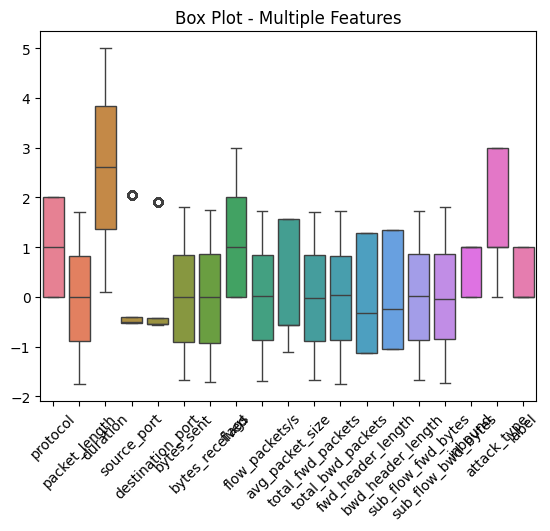

In [31]:

# Multiple features box plot
sns.boxplot(data=cyber_data)
plt.title("Box Plot - Multiple Features")
plt.xticks(rotation=45)  # Rotate feature names if needed
plt.show()


In [32]:

#Setting Feature and Target Variables to train the model
X = cyber_data.drop(columns=['label'])
y = cyber_data['label']

# Fit a RandomForest model to get feature_importances_
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)



RandomForestClassifier(random_state=42)

In [33]:


# Get feature importance
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importances)


               Feature  Importance
15  sub_flow_bwd_bytes    0.092761
5           bytes_sent    0.092075
14  sub_flow_fwd_bytes    0.091063
1        packet_length    0.089983
2             duration    0.088448
6       bytes_received    0.086276
8       flow_packets/s    0.083629
10   total_fwd_packets    0.073212
11   total_bwd_packets    0.071241
3          source_port    0.035154
4     destination_port    0.033023
17         attack_type    0.028986
7                flags    0.026786
9      avg_packet_size    0.025922
12   fwd_header_length    0.022973
13   bwd_header_length    0.022721
0             protocol    0.022244
16             inbound    0.013501


In [34]:

#Dropping least important columns based on feature_importances
cols_to_drop = ["inbound", "protocol", "bwd_header_length", "fwd_header_length", "flags", "avg_packet_size"]
cyber_data = cyber_data.drop(columns=cols_to_drop)

cyber_data.head()




,packet_length,duration,source_port,destination_port,bytes_sent,bytes_received,flow_packets/s,total_fwd_packets,total_bwd_packets,sub_flow_fwd_bytes,sub_flow_bwd_bytes,attack_type,label
0,0.158116,4.01,-0.518778,-0.548299,-0.598910,-0.294651,1.494581,-0.718279,0.386279,-0.667854,-0.067353,1,1
1,1.243329,3.75,-0.528704,-0.557766,-1.262999,0.028793,1.483178,-1.325592,-0.950553,-0.993175,0.434642,1,1
2,-0.764578,4.24,-0.510132,1.902922,-1.570447,-0.563896,-1.424568,-1.672628,1.010134,-1.458171,-1.047352,1,1
3,1.204884,3.09,-0.393901,-0.429204,1.071853,1.149480,-0.637766,0.669864,1.277501,-0.158657,0.750235,3,0
4,0.456943,2.52,-0.510132,-0.429204,1.467144,-0.479975,-0.979854,0.930141,-1.217920,1.418441,-0.866486,2,1


In [36]:


cyber_data['attack_type'].unique




<bound method Series.unique of 0       1
1       1
2       1
3       3
4       2
       ..
1425    3
1426    2
1427    2
1428    3
1429    0
Name: attack_type, Length: 1430, dtype: int64>

In [37]:

cyber_data.head()

cyber_data.head().T

cyber_data.columns



Index(['packet_length', 'duration', 'source_port', 'destination_port',
       'bytes_sent', 'bytes_received', 'flow_packets/s', 'total_fwd_packets',
       'total_bwd_packets', 'sub_flow_fwd_bytes', 'sub_flow_bwd_bytes',
       'attack_type', 'label'],
      dtype='object')

In [38]:


#Finalized feature and target variable
X = cyber_data.drop(columns=['label'])
y = cyber_data['label']

print(X.isnull().sum())


packet_length         0
duration              0
source_port           0
destination_port      0
bytes_sent            0
bytes_received        0
flow_packets/s        0
total_fwd_packets     0
total_bwd_packets     0
sub_flow_fwd_bytes    0
sub_flow_bwd_bytes    0
attack_type           0
dtype: int64


dict_items([('Logistic Regression', LogisticRegression(random_state=42)), ('Decision Tree Classifier', DecisionTreeClassifier(random_state=42)), ('Random Forest Classifier', RandomForestClassifier(random_state=42)), ('Support Vector Classifier', SVC(C=10, class_weight='balanced', gamma='auto', kernel='poly',
    probability=True, random_state=42)), ('Naive Bayes Classifier', GaussianNB())])
**** Logistic Regression ****
Logistic Regression : Confusion Matrix


**** Decision Tree Classifier ****
Decision Tree Classifier : Confusion Matrix


**** Random Forest Classifier ****
Random Forest Classifier : Confusion Matrix


**** Support Vector Classifier ****
Support Vector Classifier : Confusion Matrix


**** Naive Bayes Classifier ****
Naive Bayes Classifier : Confusion Matrix




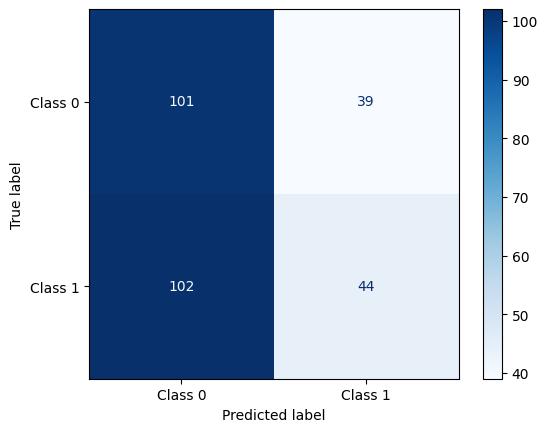

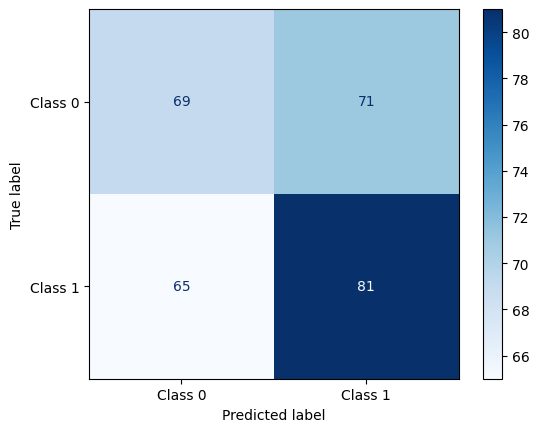

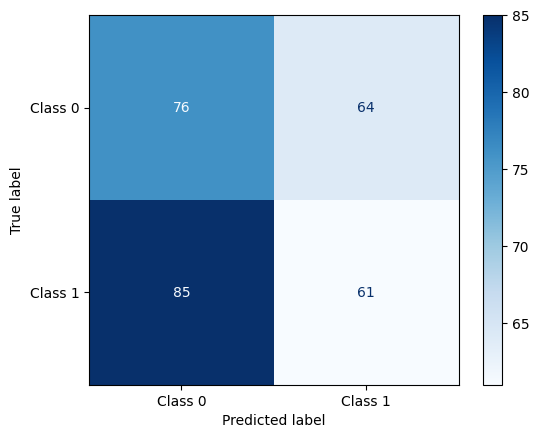

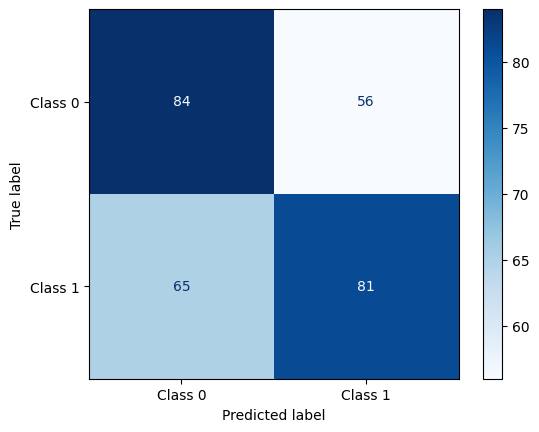

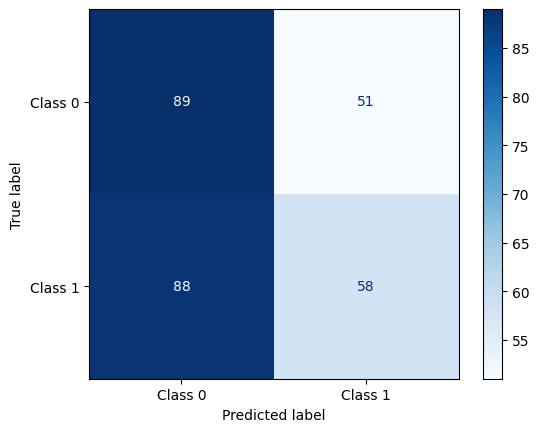

In [39]:

"""Splitting the data into Training and Test Data"""

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""Evaluating different Classification models"""

# Create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree Classifier' : DecisionTreeClassifier(random_state=42),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(kernel='poly', C = 10, degree = 3, gamma = 'auto', probability=True, class_weight='balanced',random_state=42),
    'Naive Bayes Classifier': GaussianNB()
}

# Function to evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    print(models.items())
    for name, model in models.items():
        print("****",name,"****")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        #Calculate Accuracy Score
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_pred)
         # Plot the confusion matrix
        cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])
        cm_disp.plot(cmap='Blues')
        print(name,": Confusion Matrix")
        print("\n")
        results[name] = {'accuracy': accuracy, 'classification_report': report}
    return results

# Evaluate all models
results = evaluate_models(models, X_train, X_test, y_train, y_test)


In [40]:

# Display the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Classification Report: \n{metrics['classification_report']}")

"""Hyperparameter Tuning Using XGBClassifier

(But SVC shows more accuracy than XGBClassifier)
"""


Model: Logistic Regression
Accuracy: 0.506993006993007
Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.72      0.59       140
           1       0.53      0.30      0.38       146

    accuracy                           0.51       286
   macro avg       0.51      0.51      0.49       286
weighted avg       0.51      0.51      0.48       286

Model: Decision Tree Classifier
Accuracy: 0.5244755244755245
Classification Report: 
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       140
           1       0.53      0.55      0.54       146

    accuracy                           0.52       286
   macro avg       0.52      0.52      0.52       286
weighted avg       0.52      0.52      0.52       286

Model: Random Forest Classifier
Accuracy: 0.479020979020979
Classification Report: 
              precision    recall  f1-score   support

           0       0.47      0.54      0.50

'Hyperparameter Tuning Using XGBClassifier\n\n(But SVC shows more accuracy than XGBClassifier)\n'

In [41]:

from xgboost import XGBClassifier

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    random_state=42,
    n_estimators=300,        # Number of trees
    learning_rate=0.05,      # Learning rate (step size shrinkage)
    max_depth=6,             # Maximum depth of a tree
    colsample_bytree=0.8,    # Fraction of features used per tree
    subsample=0.8,           # Fraction of samples used per tree
    eval_metric='logloss'    # Evaluation metric
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.4f}")

# Display a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Grid Params - Best params for tuning SVC model - Commented after running once
'''from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto']
}
grid = GridSearchCV(SVC(), param_grid, scoring='f1_weighted', cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)'''


XGBoost Accuracy: 0.4895

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.47      0.47       140
           1       0.50      0.51      0.50       146

    accuracy                           0.49       286
   macro avg       0.49      0.49      0.49       286
weighted avg       0.49      0.49      0.49       286



"from sklearn.model_selection import GridSearchCV\nparam_grid = {\n    'C': [0.1, 1, 10],\n    'kernel': ['poly', 'rbf', 'sigmoid'],\n    'degree': [2, 3, 4],\n    'gamma': ['scale', 'auto']\n}\ngrid = GridSearchCV(SVC(), param_grid, scoring='f1_weighted', cv=5)\ngrid.fit(X_train, y_train)\nprint(grid.best_params_)"

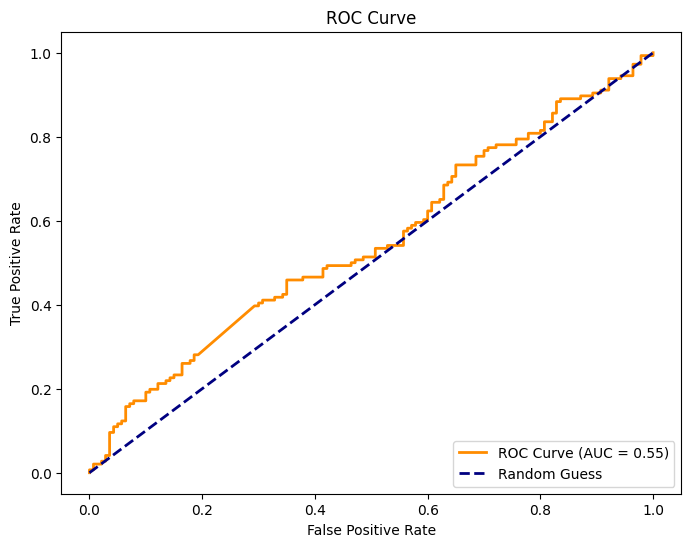

In [42]:

"""AUC ROC Curve"""

from sklearn.metrics import roc_curve, auc, RocCurveDisplay
#Train SVC with probability=True
svc = SVC(kernel='poly', probability=True, random_state=42)
svc.fit(X_train, y_train)

#Predict probabilities
y_prob = svc.predict_proba(X_test)[:, 1]  # Get probability for the positive class

#Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [43]:

"""BaggingClassifier - Tested for Max Accuracy but still SVC shares more accuracy and hence chose SVC as finalized model"""

from sklearn.ensemble import BaggingClassifier
bagging_svc = BaggingClassifier(estimator=SVC(kernel='poly', C = 10, degree = 3, gamma = 'auto', probability=True, class_weight='balanced'), n_estimators=10, random_state=42)
bagging_svc.fit(X_train, y_train)
y_pred = bagging_svc.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# AUC-ROC score
y_prob = bagging_svc.predict_proba(X_test)[:, 1]  # For AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC-ROC:", auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.86      0.63       140
           1       0.57      0.18      0.27       146

    accuracy                           0.51       286
   macro avg       0.53      0.52      0.45       286
weighted avg       0.53      0.51      0.45       286

Confusion Matrix:
 [[120  20]
 [120  26]]
AUC-ROC: 0.5688356164383561
